# Plotting IRM MPMS Data

## MPMS data plotting
This notebook imports low-temperature magnetometry experiments and plots the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 5)
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

In [2]:
mpl.rc('pdf',fonttype = 42)

In [5]:
index = list(np.arange(0,59,1))
MPMS_Data2 = pd.read_excel('../Data/rockmag/Slotznick_Nonesuch2018measurements_MPMS.xlsx', sheet_name='MPMSdc measurements', index_col = 0, header = [0,1,2], skiprows = 0)
MPMS_Data2.reset_index(drop=True,inplace=True)
MPMS_Data2

DG18-2.2a                                                        \
       Js v. T                                                         
         T [K] Bapp [T] M [Am2/kg]   reg fit               timestamp   
0   299.989700      2.5   0.369100  0.948321  11/17/2018 11:52:34 AM   
1   294.575000      2.5   0.373153  0.948460  11/17/2018 11:56:44 AM   
..         ...      ...        ...       ...                     ...   
57   13.491630      2.5   4.172318  0.936772  11/17/2018 12:50:46 PM   
58    9.998725      2.5   4.815827  0.938807   11/17/2018 1:31:28 PM   

                                                                       ...  \
   FC, remanence                                                       ...   
           T [K] Bapp [T] M [Am2/kg]   reg fit              timestamp  ...   
0       9.998997        0   0.065668  0.941492  11/17/2018 1:36:35 PM  ...   
1      15.593850        0   0.063958  0.940917  11/17/2018 1:37:58 PM  ...   
..           ...      ...        ...       ...                    ...  ...   
57    295.554300        0   0.038791  0.947088  11/17/2018 2:33:56 PM  ...   
58    300.018400        0   0.038063  0.947468  11/17/2018 2:40:04 PM  ...   

            WPB4-446a_chip                                \
   RT remanence on cooling                                 
                     T [K] Bapp [T] M [Am2/kg]   reg fit   
0                299.98970        0   0.000262  0.947098   
1                294.47540        0   0.000263  0.947705   
..                     ...      ...        ...       ...   
57                13.82111        0   0.000223  0.947173   
58                 9.99489        0   0.000226  0.945704   

                                                                              \
                          RT remanence warming                                 
                timestamp                T [K] Bapp [T] M [Am2/kg]   reg fit   
0   11/21/2018 7:53:15 AM             9.995621        0   0.000227  0.945834   
1   11/21/2018 7:56:53 AM            15.502520        0   0.000222  0.947108   
..                    ...                  ...      ...        ...       ...   
57  11/21/2018 8:50:51 AM           296.670100        0   0.000210  0.946798   
58  11/21/2018 9:28:21 AM           300.025500        0   0.000208  0.947061   

                            
                            
                 timestamp  
0    11/21/2018 9:29:30 AM  
1    11/21/2018 9:30:51 AM  
..                     ...  
57  11/21/2018 10:27:02 AM  
58  11/21/2018 10:32:53 AM  

[59 rows x 500 columns]

In [6]:
MPMS_Data2.columns

MultiIndex([(     'DG18-2.2a',                 'Js v. T',      'T [K]'),
            (     'DG18-2.2a',                 'Js v. T',   'Bapp [T]'),
            (     'DG18-2.2a',                 'Js v. T', 'M [Am2/kg]'),
            (     'DG18-2.2a',                 'Js v. T',    'reg fit'),
            (     'DG18-2.2a',                 'Js v. T',  'timestamp'),
            (     'DG18-2.2a',           'FC, remanence',      'T [K]'),
            (     'DG18-2.2a',           'FC, remanence',   'Bapp [T]'),
            (     'DG18-2.2a',           'FC, remanence', 'M [Am2/kg]'),
            (     'DG18-2.2a',           'FC, remanence',    'reg fit'),
            (     'DG18-2.2a',           'FC, remanence',  'timestamp'),
            ...
            ('WPB4-446a_chip', 'RT remanence on cooling',      'T [K]'),
            ('WPB4-446a_chip', 'RT remanence on cooling',   'Bapp [T]'),
            ('WPB4-446a_chip', 'RT remanence on cooling', 'M [Am2/kg]'),
            ('WPB4-446a_chip', 'RT 

Now the new way!!! that will actually use!

In [7]:
def get_MPMS_data(excel_sheet, start_column_number):
    Js_T = excel_sheet.iloc[:,start_column_number][2:].tolist()
    Js_M = excel_sheet.iloc[:,start_column_number+2][2:].tolist()
    Js_reg = excel_sheet.iloc[:,start_column_number+3][2:].tolist()
    
    FC_T = excel_sheet.iloc[:,start_column_number+5][2:].tolist()
    FC_M = excel_sheet.iloc[:,start_column_number+7][2:].tolist()
    FC_reg = excel_sheet.iloc[:,start_column_number+8][2:].tolist()
    
    ZFC_T = excel_sheet.iloc[:,start_column_number+10][2:].tolist()
    ZFC_M = excel_sheet.iloc[:,start_column_number+12][2:].tolist()
    ZFC_reg = excel_sheet.iloc[:,start_column_number+13][2:].tolist()
    
    RT_cool_T = excel_sheet.iloc[:,start_column_number+15][2:].tolist()
    RT_cool_M = excel_sheet.iloc[:,start_column_number+17][2:].tolist()
    RT_cool_reg = excel_sheet.iloc[:,start_column_number+18][2:].tolist()
    
    RT_warm_T = excel_sheet.iloc[:,start_column_number+20][2:].tolist()
    RT_warm_M = excel_sheet.iloc[:,start_column_number+22][2:].tolist()
    RT_warm_reg = excel_sheet.iloc[:,start_column_number+23][2:].tolist()
    
    FC_T = [FC_T[i] for i in range(len(FC_T)) if str(FC_T[i]) != 'nan' and FC_reg[i]>0.9]
    FC_M = [FC_M[i] for i in range(len(FC_M)) if str(FC_M[i]) != 'nan' and FC_reg[i]>0.9]
    ZFC_T = [ZFC_T[i] for i in range(len(ZFC_T)) if str(ZFC_T[i]) != 'nan' and ZFC_reg[i]>0.9]
    ZFC_M = [ZFC_M[i] for i in range(len(ZFC_M)) if str(ZFC_M[i]) != 'nan' and ZFC_reg[i]>0.9]
    RT_cool_T = [RT_cool_T[i] for i in range(len(RT_cool_T)) if str(RT_cool_T[i]) != 'nan' and RT_cool_reg[i]>0.9]
    RT_cool_M = [RT_cool_M[i] for i in range(len(RT_cool_M)) if str(RT_cool_M[i]) != 'nan' and RT_cool_reg[i]>0.9]
    RT_warm_T = [RT_warm_T[i] for i in range(len(RT_warm_T)) if str(RT_warm_T[i]) != 'nan' and RT_warm_reg[i]>0.9]
    RT_warm_M = [RT_warm_M[i] for i in range(len(RT_warm_M)) if str(RT_warm_M[i]) != 'nan' and RT_warm_reg[i]>0.9]

    return {'FC':[FC_T, FC_M], 'ZFC':[ZFC_T, ZFC_M], 'RT_cool':[RT_cool_T, RT_cool_M], 'RT_warm':[RT_warm_T, RT_warm_M]}

In [10]:
MPMS_Data = pd.read_excel('../Data/rockmag/Slotznick_Nonesuch2018measurements_MPMS.xlsx', sheet_name='MPMSdc measurements', index_col = 0, skiprows = 0)
MPMS_Data.reset_index(drop=True,inplace=True)
MPMS_Data

,DG18-2.2a,DG18-2.2a.1,DG18-2.2a.2,DG18-2.2a.3,DG18-2.2a.4,DG18-2.2a.5,DG18-2.2a.6,DG18-2.2a.7,DG18-2.2a.8,DG18-2.2a.9,...,WPB4-446a_chip.15,WPB4-446a_chip.16,WPB4-446a_chip.17,WPB4-446a_chip.18,WPB4-446a_chip.19,WPB4-446a_chip.20,WPB4-446a_chip.21,WPB4-446a_chip.22,WPB4-446a_chip.23,WPB4-446a_chip.24
0,Js v. T,Js v. T,Js v. T,Js v. T,Js v. T,"FC, remanence","FC, remanence","FC, remanence","FC, remanence","FC, remanence",...,RT remanence on cooling,RT remanence on cooling,RT remanence on cooling,RT remanence on cooling,RT remanence on cooling,RT remanence warming,RT remanence warming,RT remanence warming,RT remanence warming,RT remanence warming
1,T [K],Bapp [T],M [Am2/kg],reg fit,timestamp,T [K],Bapp [T],M [Am2/kg],reg fit,timestamp,...,T [K],Bapp [T],M [Am2/kg],reg fit,timestamp,T [K],Bapp [T],M [Am2/kg],reg fit,timestamp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,13.49163,2.5,4.172318,0.936772,11/17/2018 12:50:46 PM,295.5543,0,0.038791,0.947088,11/17/2018 2:33:56 PM,...,13.82111,0,0.000223,0.947173,11/21/2018 8:50:51 AM,296.6701,0,0.00021,0.946798,11/21/2018 10:27:02 AM
60,9.998725,2.5,4.815827,0.938807,11/17/2018 1:31:28 PM,300.0184,0,0.038063,0.947468,11/17/2018 2:40:04 PM,...,9.99489,0,0.000226,0.945704,11/21/2018 9:28:21 AM,300.0255,0,0.000208,0.947061,11/21/2018 10:32:53 AM


In [11]:
DG18_2 = get_MPMS_data(MPMS_Data,0)
DG18_28 = get_MPMS_data(MPMS_Data,25)
DG18_67 = get_MPMS_data(MPMS_Data,50)
DG18_95 = get_MPMS_data(MPMS_Data,75)
PC1_177 = get_MPMS_data(MPMS_Data,100)
PC1_335 = get_MPMS_data(MPMS_Data,125)
PC1_627 = get_MPMS_data(MPMS_Data,150)
PF18_1 = get_MPMS_data(MPMS_Data,200)
PF18_157 = get_MPMS_data(MPMS_Data,225)
PF18_162 = get_MPMS_data(MPMS_Data,250)
PF18_30 = get_MPMS_data(MPMS_Data,275)
PF18_59 = get_MPMS_data(MPMS_Data,300)
PIR18_116 = get_MPMS_data(MPMS_Data,325)
PIR18_138 = get_MPMS_data(MPMS_Data,350)
PIR18_201 = get_MPMS_data(MPMS_Data,375)
PIR18_321 = get_MPMS_data(MPMS_Data,400)
PIR18_73 = get_MPMS_data(MPMS_Data,425)
WPB4_249 = get_MPMS_data(MPMS_Data,450)
WPB4_446 = get_MPMS_data(MPMS_Data,475)

In [12]:
DG18_67RTcool_T = MPMS_Data.iloc[:,65][2:].tolist()
DG18_67RTcool_M = MPMS_Data.iloc[:,67][2:].tolist()

# Plotting Each by Site

### DG18- Plots

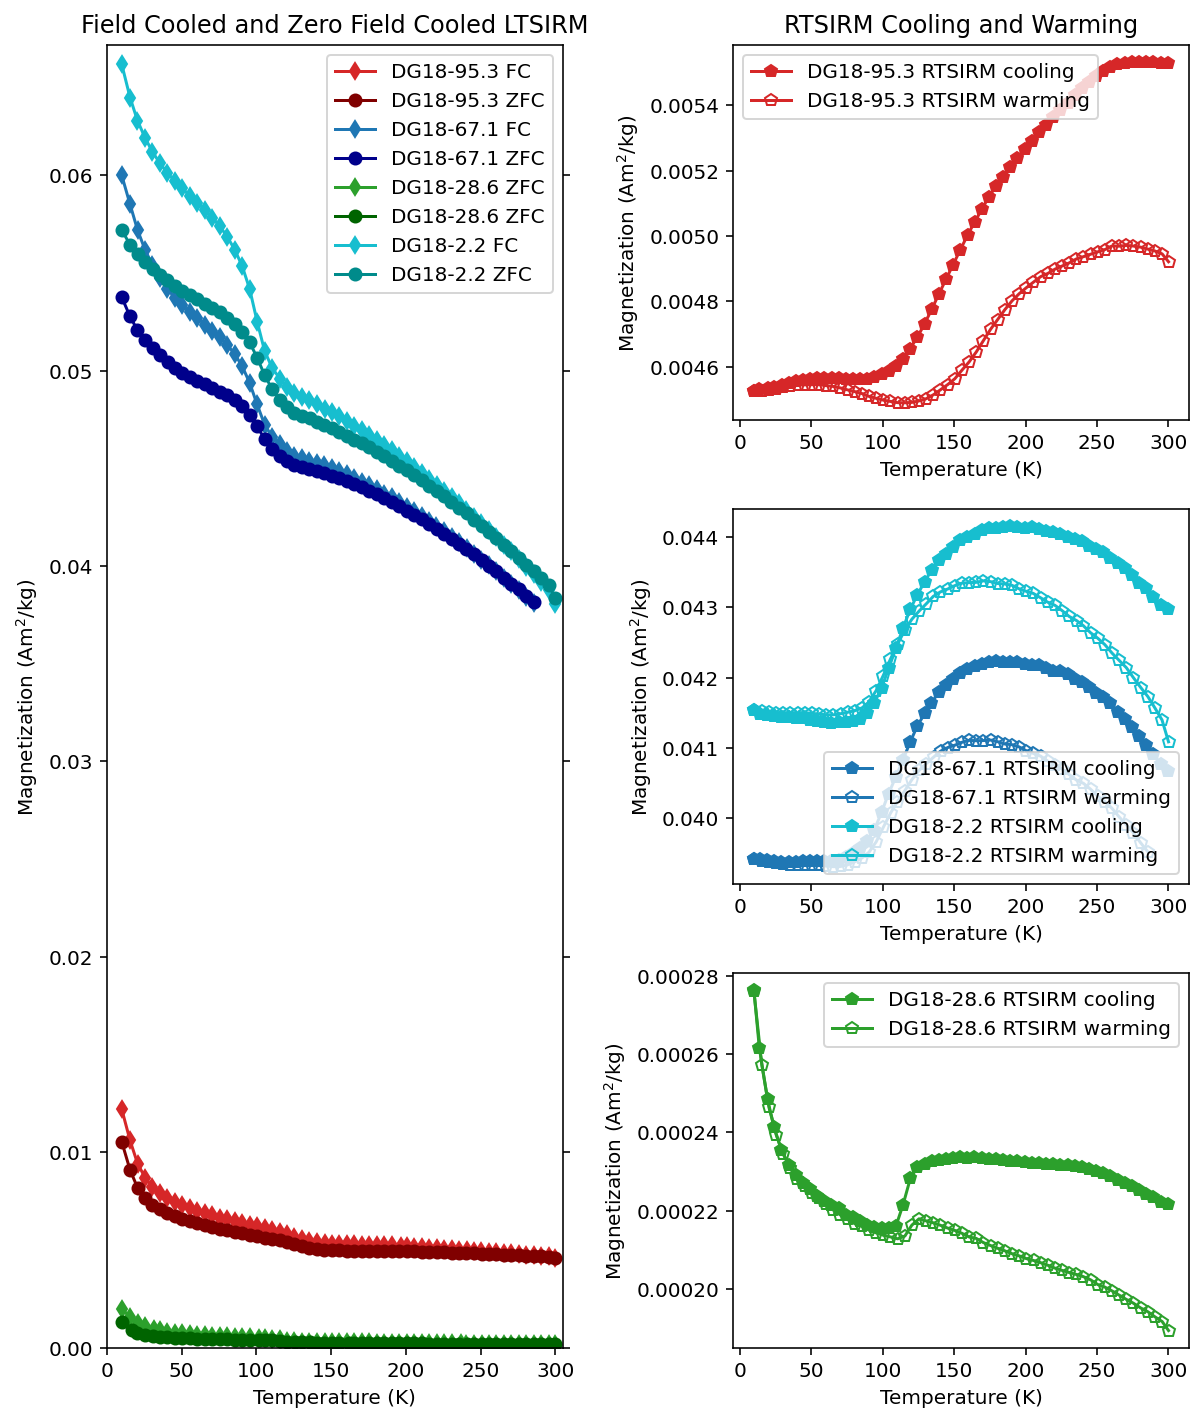

In [15]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
plt.subplot2grid((3,2),(0,0),rowspan=3)
plt.plot(DG18_95['FC'][0], DG18_95['FC'][1],label='DG18-95.3 FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(DG18_95['ZFC'][0], DG18_95['ZFC'][1],label='DG18-95.3 ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.plot(DG18_67['FC'][0], DG18_67['FC'][1],label='DG18-67.1 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(DG18_67['ZFC'][0], DG18_67['ZFC'][1],label='DG18-67.1 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(DG18_28['FC'][0], DG18_28['FC'][1],label='DG18-28.6 ZFC',color = 'tab:green', marker = 'd', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(DG18_28['ZFC'][0], DG18_28['ZFC'][1],label='DG18-28.6 ZFC',color ='darkgreen', marker = 'o', markerfacecolor='darkgreen', markeredgecolor='darkgreen')
plt.plot(DG18_2['FC'][0], DG18_2['FC'][1],label='DG18-2.2 FC',color = 'tab:cyan', marker = 'd', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(DG18_2['ZFC'][0], DG18_2['ZFC'][1],label='DG18-2.2 ZFC',color ='darkcyan', marker = 'o', markerfacecolor='darkcyan', markeredgecolor='darkcyan')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(DG18_2['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((3,2),(0,1))
plt.plot(DG18_95['RT_cool'][0], DG18_95['RT_cool'][1],label='DG18-95.3 RTSIRM cooling',color = 'tab:red', marker = 'p', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(DG18_95['RT_warm'][0], DG18_95['RT_warm'][1],label='DG18-95.3 RTSIRM warming',color = 'tab:red', marker = 'p', markerfacecolor="None", markeredgecolor='tab:red')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(1,1))
plt.plot(DG18_67RTcool_T, DG18_67RTcool_M,label='DG18-67.1 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(DG18_67['RT_warm'][0], DG18_67['RT_warm'][1],label='DG18-67.1 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.plot(DG18_2['RT_cool'][0], DG18_2['RT_cool'][1],label='DG18-2.2 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(DG18_2['RT_warm'][0], DG18_2['RT_warm'][1],label='DG18-2.2 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.subplot2grid((3,2),(2,1))
plt.plot(DG18_28['RT_cool'][0], DG18_28['RT_cool'][1],label='DG18-28.6 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(DG18_28['RT_warm'][0], DG18_28['RT_warm'][1],label='DG18-28.6 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:green')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/DG18_MPMS_plots_Combo.pdf')
#plt.savefig('DG18_MPMS_plots_Combo.svg')
plt.show()

### PF18- Plots

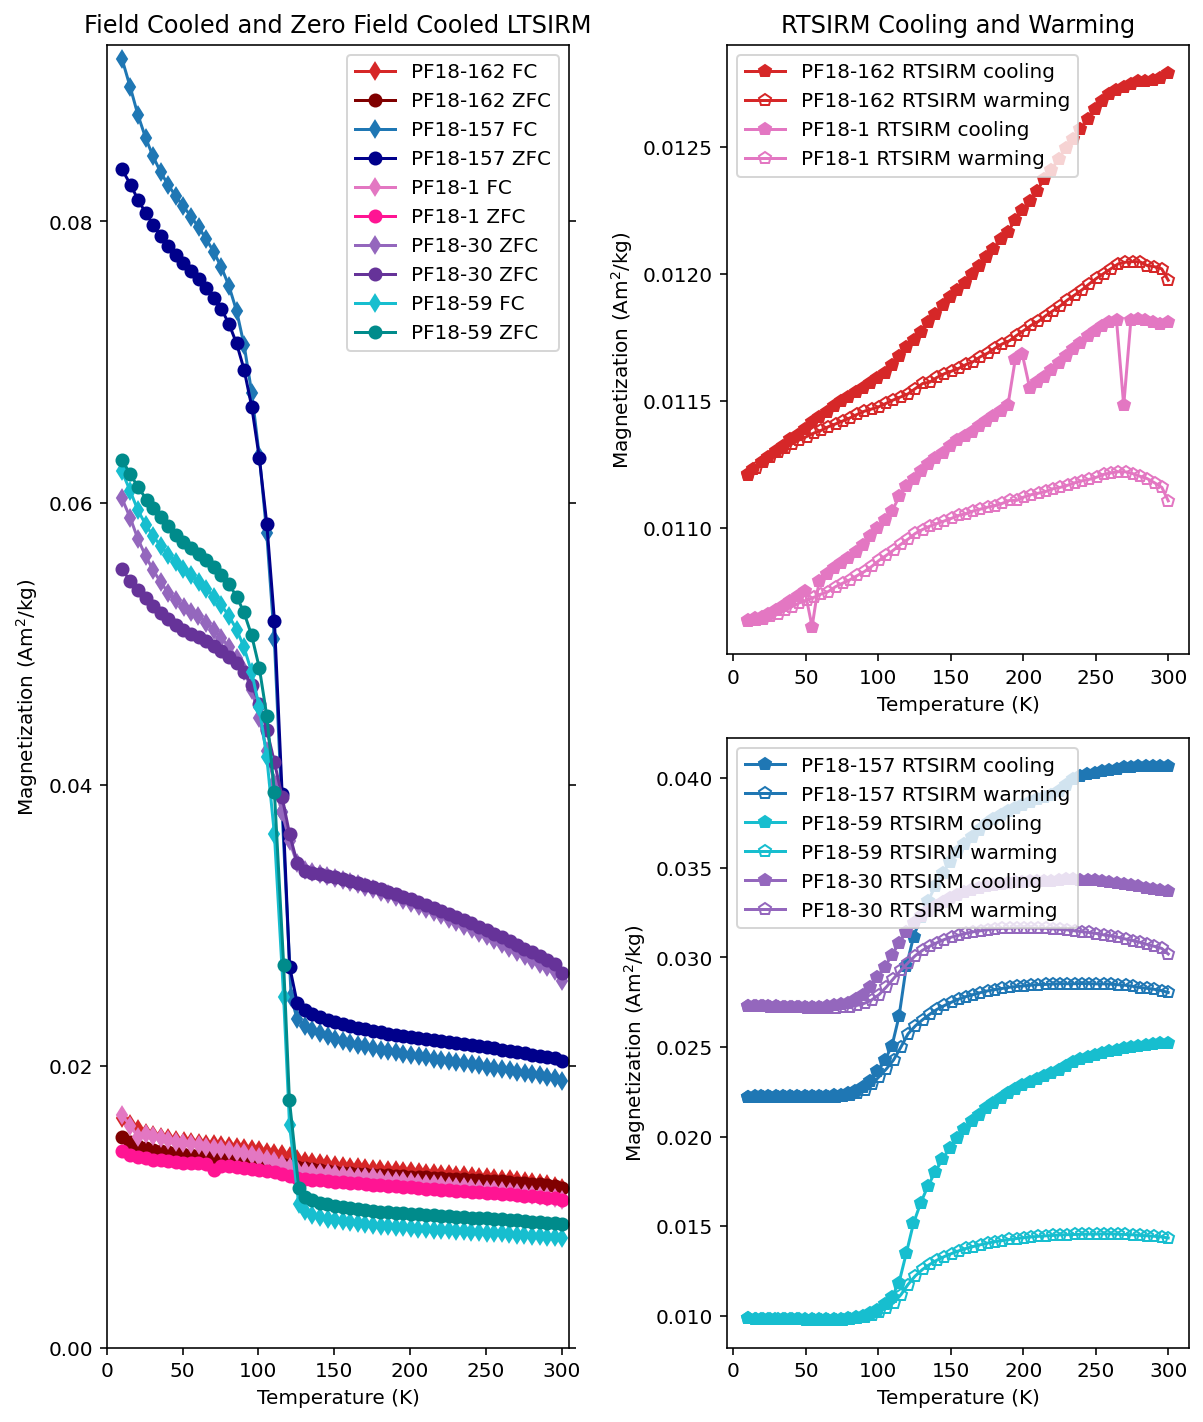

In [16]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
plt.subplot2grid((2,2),(0,0),rowspan=2)
plt.plot(PF18_162['FC'][0], PF18_162['FC'][1],label='PF18-162 FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PF18_162['ZFC'][0], PF18_162['ZFC'][1],label='PF18-162 ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.plot(PF18_157['FC'][0], PF18_157['FC'][1],label='PF18-157 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PF18_157['ZFC'][0], PF18_157['ZFC'][1],label='PF18-157 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(PF18_1['FC'][0], PF18_1['FC'][1],label='PF18-1 FC',color = 'tab:pink', marker = 'd', markerfacecolor='tab:pink', markeredgecolor='tab:pink')
plt.plot(PF18_1['ZFC'][0], PF18_1['ZFC'][1],label='PF18-1 ZFC',color ='deeppink', marker = 'o', markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.plot(PF18_30['FC'][0], PF18_30['FC'][1],label='PF18-30 ZFC',color = 'tab:purple', marker = 'd', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PF18_30['ZFC'][0], PF18_30['ZFC'][1],label='PF18-30 ZFC',color ='rebeccapurple', marker = 'o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple')
plt.plot(PF18_59['FC'][0], PF18_59['FC'][1],label='PF18-59 FC',color = 'tab:cyan', marker = 'd', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PF18_59['ZFC'][0], PF18_59['ZFC'][1],label='PF18-59 ZFC',color ='darkcyan', marker = 'o', markerfacecolor='darkcyan', markeredgecolor='darkcyan')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(PF18_157['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((2,2),(0,1))
plt.plot(PF18_162['RT_cool'][0], PF18_162['RT_cool'][1],label='PF18-162 RTSIRM cooling',color = 'tab:red', marker = 'p', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PF18_162['RT_warm'][0], PF18_162['RT_warm'][1],label='PF18-162 RTSIRM warming',color = 'tab:red', marker = 'p', markerfacecolor="None", markeredgecolor='tab:red')
plt.plot(PF18_1['RT_cool'][0], PF18_1['RT_cool'][1],label='PF18-1 RTSIRM cooling',color = 'tab:pink', marker = 'p', markerfacecolor='tab:pink', markeredgecolor='tab:pink')
plt.plot(PF18_1['RT_warm'][0], PF18_1['RT_warm'][1],label='PF18-1 RTSIRM warming',color = 'tab:pink', marker = 'p', markerfacecolor="None", markeredgecolor='tab:pink')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((2,2),(1,1))
plt.plot(PF18_157['RT_cool'][0], PF18_157['RT_cool'][1],label='PF18-157 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PF18_157['RT_warm'][0], PF18_157['RT_warm'][1],label='PF18-157 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.plot(PF18_59['RT_cool'][0], PF18_59['RT_cool'][1],label='PF18-59 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PF18_59['RT_warm'][0], PF18_59['RT_warm'][1],label='PF18-59 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
plt.plot(PF18_30['RT_cool'][0], PF18_30['RT_cool'][1],label='PF18-30 RTSIRM cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PF18_30['RT_warm'][0], PF18_30['RT_warm'][1],label='PF18-30 RTSIRM warming',color = 'tab:purple', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:purple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/PF18_MPMS_plots_Combo.pdf')
plt.show()

### PC1- Plots

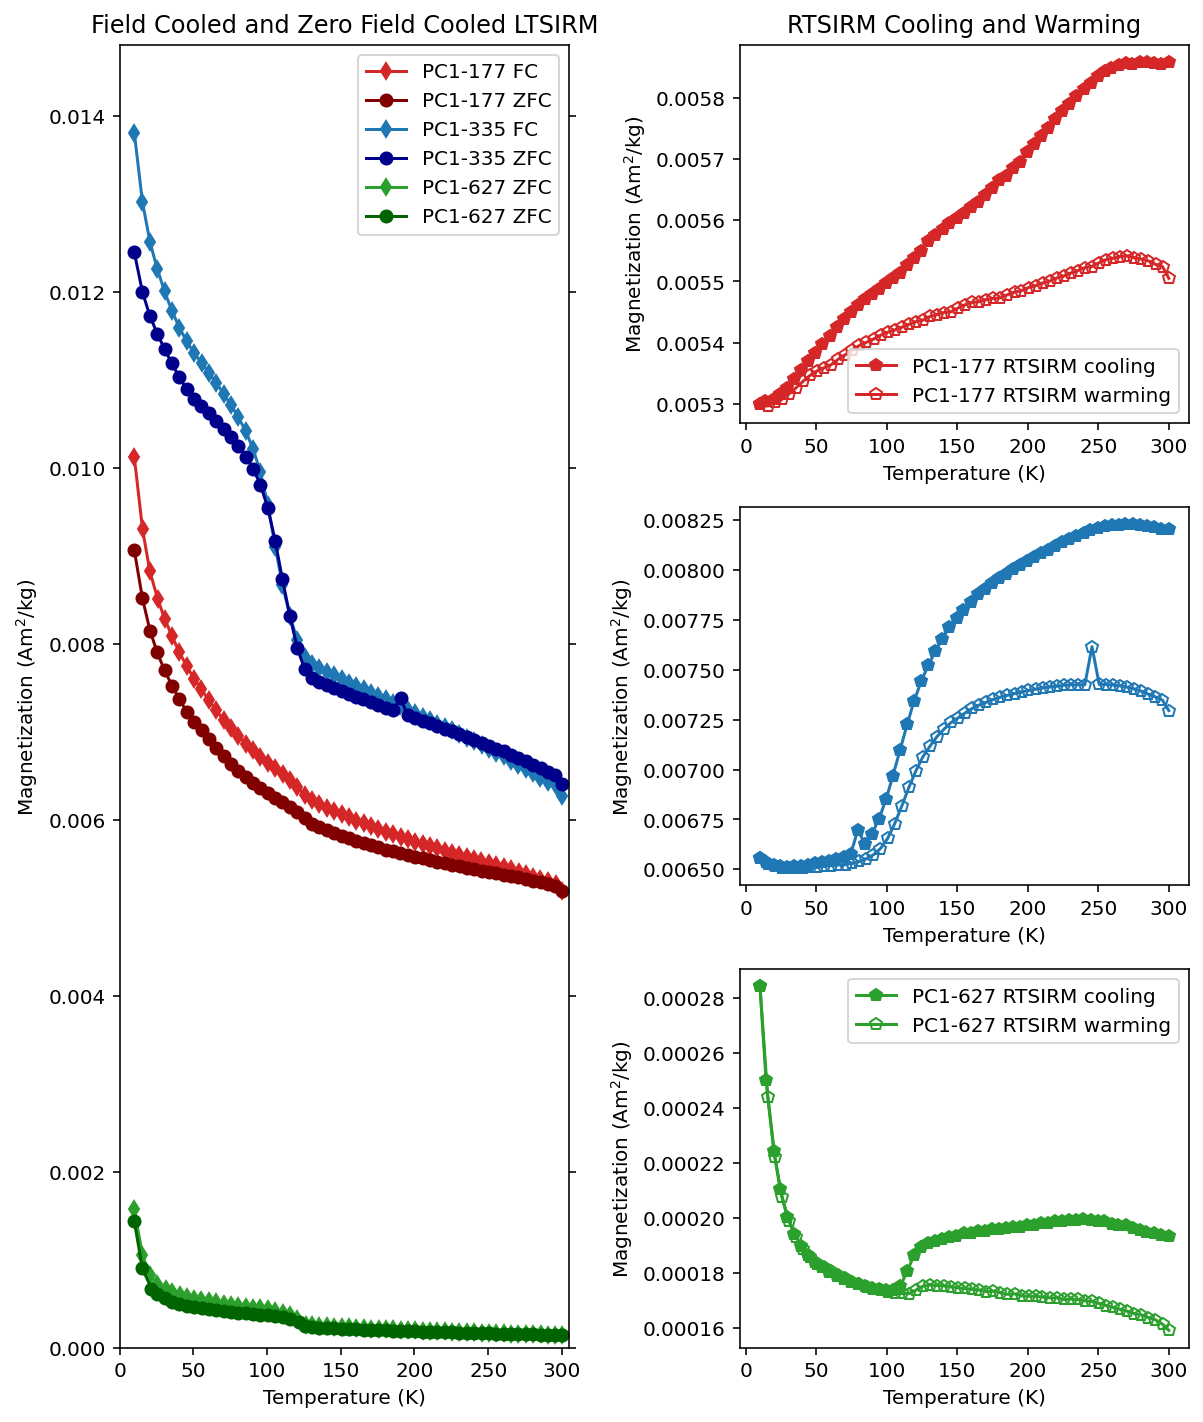

In [17]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
plt.subplot2grid((3,2),(0,0),rowspan=3)
plt.plot(PC1_177['FC'][0], PC1_177['FC'][1],label='PC1-177 FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PC1_177['ZFC'][0], PC1_177['ZFC'][1],label='PC1-177 ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.plot(PC1_335['FC'][0], PC1_335['FC'][1],label='PC1-335 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PC1_335['ZFC'][0], PC1_335['ZFC'][1],label='PC1-335 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(PC1_627['FC'][0], PC1_627['FC'][1],label='PC1-627 ZFC',color = 'tab:green', marker = 'd', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PC1_627['ZFC'][0], PC1_627['ZFC'][1],label='PC1-627 ZFC',color ='darkgreen', marker = 'o', markerfacecolor='darkgreen', markeredgecolor='darkgreen')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(PC1_335['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((3,2),(0,1))
plt.plot(PC1_177['RT_cool'][0], PC1_177['RT_cool'][1],label='PC1-177 RTSIRM cooling',color = 'tab:red', marker = 'p', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PC1_177['RT_warm'][0], PC1_177['RT_warm'][1],label='PC1-177 RTSIRM warming',color = 'tab:red', marker = 'p', markerfacecolor="None", markeredgecolor='tab:red')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(1,1))
plt.plot(PC1_335['RT_cool'][0], PC1_335['RT_cool'][1],label='PC1-335 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PC1_335['RT_warm'][0], PC1_335['RT_warm'][1],label='PC1-335 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
#plt.legend()

plt.subplot2grid((3,2),(2,1))
plt.plot(PC1_627['RT_cool'][0], PC1_627['RT_cool'][1],label='PC1-627 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PC1_627['RT_warm'][0], PC1_627['RT_warm'][1],label='PC1-627 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:green')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/PC1_MPMS_plots_Combo.pdf')
plt.show()

### PIR18- Plots

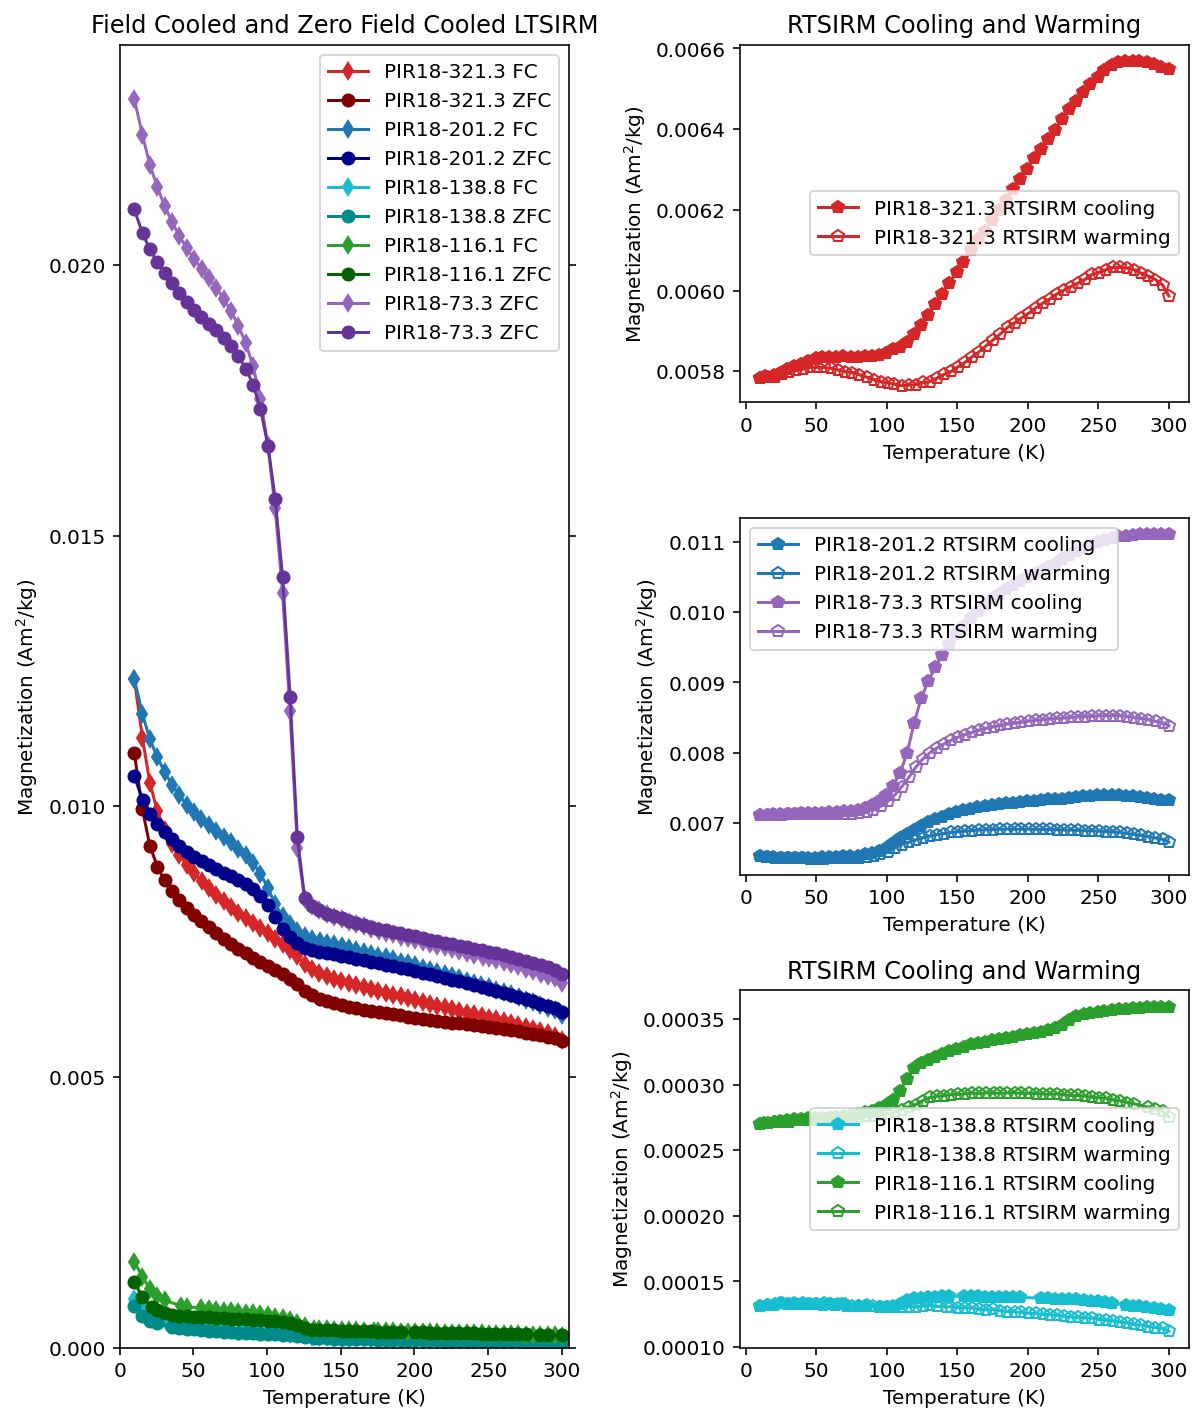

In [18]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
ax1 = plt.subplot2grid((3,2),(0,0),rowspan=3)
plt.plot(PIR18_321['FC'][0], PIR18_321['FC'][1],label='PIR18-321.3 FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PIR18_321['ZFC'][0], PIR18_321['ZFC'][1],label='PIR18-321.3 ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.plot(PIR18_201['FC'][0], PIR18_201['FC'][1],label='PIR18-201.2 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PIR18_201['ZFC'][0], PIR18_201['ZFC'][1],label='PIR18-201.2 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(PIR18_138['FC'][0], PIR18_138['FC'][1],label='PIR18-138.8 FC',color = 'tab:cyan', marker = 'd', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PIR18_138['ZFC'][0], PIR18_138['ZFC'][1],label='PIR18-138.8 ZFC',color ='darkcyan', marker = 'o', markerfacecolor='darkcyan', markeredgecolor='darkcyan')
plt.plot(PIR18_116['FC'][0], PIR18_116['FC'][1],label='PIR18-116.1 FC',color = 'tab:green', marker = 'd', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PIR18_116['ZFC'][0], PIR18_116['ZFC'][1],label='PIR18-116.1 ZFC',color ='darkgreen', marker = 'o', markerfacecolor='darkgreen', markeredgecolor='darkgreen')
plt.plot(PIR18_73['FC'][0], PIR18_73['FC'][1],label='PIR18-73.3 ZFC',color = 'tab:purple', marker = 'd', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PIR18_73['ZFC'][0], PIR18_73['ZFC'][1],label='PIR18-73.3 ZFC',color ='rebeccapurple', marker = 'o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(PIR18_73['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((3,2),(0,1))
plt.plot(PIR18_321['RT_cool'][0], PIR18_321['RT_cool'][1],label='PIR18-321.3 RTSIRM cooling',color = 'tab:red', marker = 'p', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PIR18_321['RT_warm'][0], PIR18_321['RT_warm'][1],label='PIR18-321.3 RTSIRM warming',color = 'tab:red', marker = 'p', markerfacecolor="None", markeredgecolor='tab:red')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(1,1))
plt.plot(PIR18_201['RT_cool'][0], PIR18_201['RT_cool'][1],label='PIR18-201.2 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PIR18_201['RT_warm'][0], PIR18_201['RT_warm'][1],label='PIR18-201.2 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.plot(PIR18_73['RT_cool'][0], PIR18_73['RT_cool'][1],label='PIR18-73.3 RTSIRM cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PIR18_73['RT_warm'][0], PIR18_73['RT_warm'][1],label='PIR18-73.3 RTSIRM warming',color = 'tab:purple', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:purple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.subplot2grid((3,2),(2,1))
plt.plot(PIR18_138['RT_cool'][0], PIR18_138['RT_cool'][1],label='PIR18-138.8 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PIR18_138['RT_warm'][0], PIR18_138['RT_warm'][1],label='PIR18-138.8 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
plt.plot(PIR18_116['RT_cool'][0], PIR18_116['RT_cool'][1],label='PIR18-116.1 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PIR18_116['RT_warm'][0], PIR18_116['RT_warm'][1],label='PIR18-116.1 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor="None", markeredgecolor='tab:green')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/PIR18_MPMS_plots_Combo.pdf')
plt.show()

### WPB-4 Plots

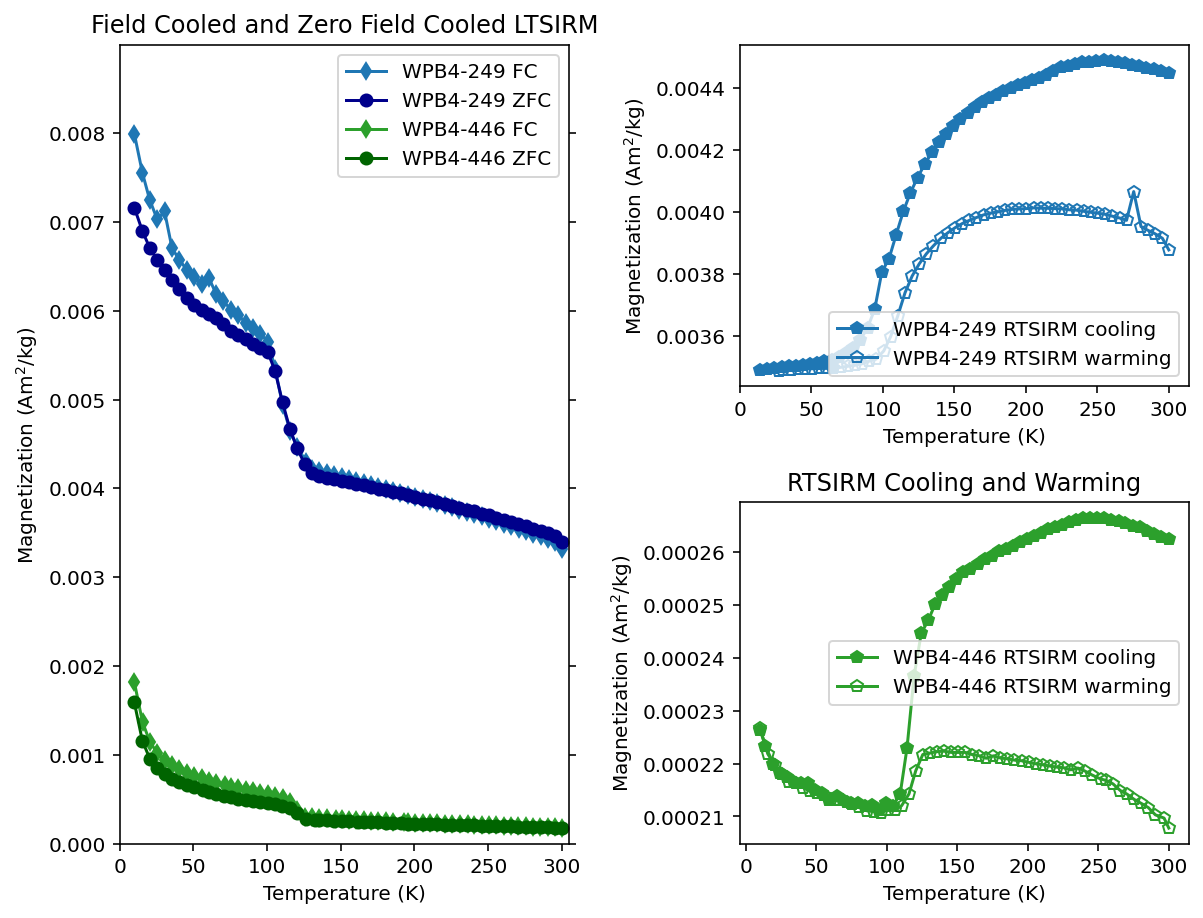

In [19]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,6.5))
plt.subplot2grid((2,2),(0,0),rowspan=2)
plt.plot(WPB4_249['FC'][0], WPB4_249['FC'][1],label='WPB4-249 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(WPB4_249['ZFC'][0], WPB4_249['ZFC'][1],label='WPB4-249 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(WPB4_446['FC'][0], WPB4_446['FC'][1],label='WPB4-446 FC',color = 'tab:green', marker = 'd', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(WPB4_446['ZFC'][0], WPB4_446['ZFC'][1],label='WPB4-446 ZFC',color ='darkgreen', marker = 'o', markerfacecolor='darkgreen', markeredgecolor='darkgreen')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(WPB4_249['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((2,2),(0,1))
plt.plot(WPB4_249['RT_cool'][0], WPB4_249['RT_cool'][1],label='WPB4-249 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(WPB4_249['RT_warm'][0], WPB4_249['RT_warm'][1],label='WPB4-249 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.subplot2grid((2,2),(1,1))
plt.plot(WPB4_446['RT_cool'][0], WPB4_446['RT_cool'][1],label='WPB4-446 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(WPB4_446['RT_warm'][0], WPB4_446['RT_warm'][1],label='WPB4-446 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor="None", markeredgecolor='tab:green')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/WPB4_MPMS_plots_Combo.pdf')
plt.show()

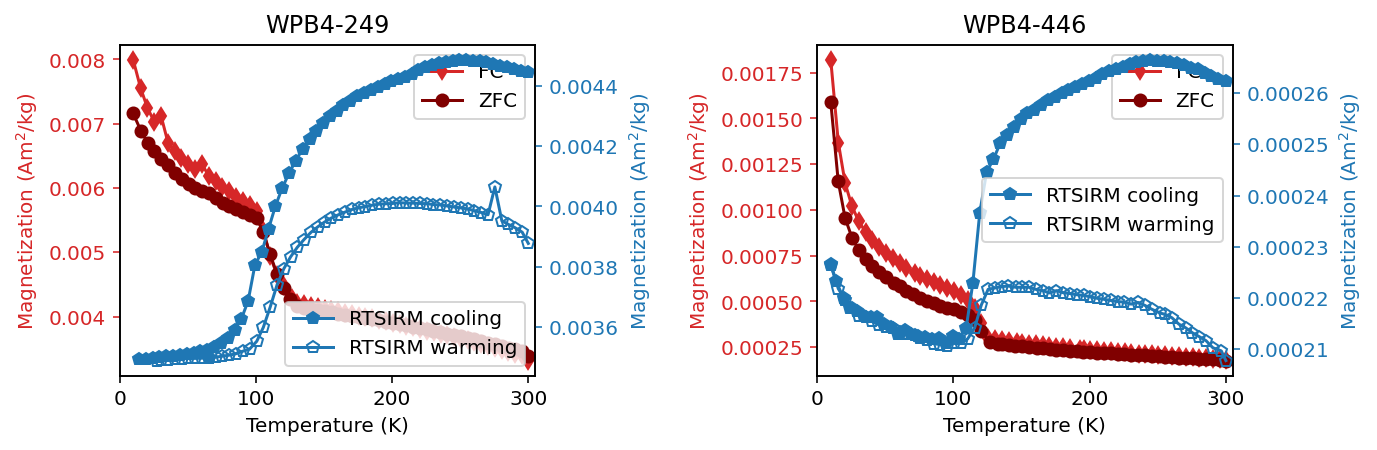

In [20]:
#plt.figure(figsize=(8.5,3.25))
plt.figure(figsize=(9.75,3.25))
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.plot(WPB4_249['FC'][0], WPB4_249['FC'][1],label='FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
ax1.plot(WPB4_249['ZFC'][0], WPB4_249['ZFC'][1],label='ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.legend()
ax2 = ax1.twinx()
ax2.plot(WPB4_249['RT_cool'][0], WPB4_249['RT_cool'][1],label='RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
ax2.plot(WPB4_249['RT_warm'][0], WPB4_249['RT_warm'][1],label='RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.xlim(0,305)
#ax2.set_ylim(0,max(WPB4_249['FC'][1])+.001)
#ax1.set_ylim(0,max(WPB4_249['FC'][1])+.001)
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Magnetization ($Am^{2}/kg$)', color = 'tab:red')
ax2.set_ylabel('Magnetization ($Am^{2}/kg$)', color = 'tab:blue')
ax1.tick_params(axis='y', color = 'tab:red', labelcolor = 'tab:red')
ax2.tick_params(axis='y', color = 'tab:blue', labelcolor = 'tab:blue')
plt.title('WPB4-249')
plt.legend()

ax3 = plt.subplot2grid((1,2),(0,1))
ax3.plot(WPB4_446['FC'][0], WPB4_446['FC'][1],label='FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
ax3.plot(WPB4_446['ZFC'][0], WPB4_446['ZFC'][1],label='ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.legend()
ax4 = ax3.twinx()
ax4.plot(WPB4_446['RT_cool'][0], WPB4_446['RT_cool'][1],label='RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
ax4.plot(WPB4_446['RT_warm'][0], WPB4_446['RT_warm'][1],label='RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.xlim(0,305)
ax3.set_xlabel('Temperature (K)')
ax3.set_ylabel('Magnetization ($Am^{2}/kg$)', color = 'tab:red')
ax4.set_ylabel('Magnetization ($Am^{2}/kg$)', color = 'tab:blue')
ax3.tick_params(axis='y', color = 'tab:red', labelcolor = 'tab:red')
ax4.tick_params(axis='y', color = 'tab:blue', labelcolor = 'tab:blue')
plt.title('WPB4-446')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/WPB4_MPMS_plots_Indiv.pdf')
plt.show()

# Plot by Facies

Facies 1 First

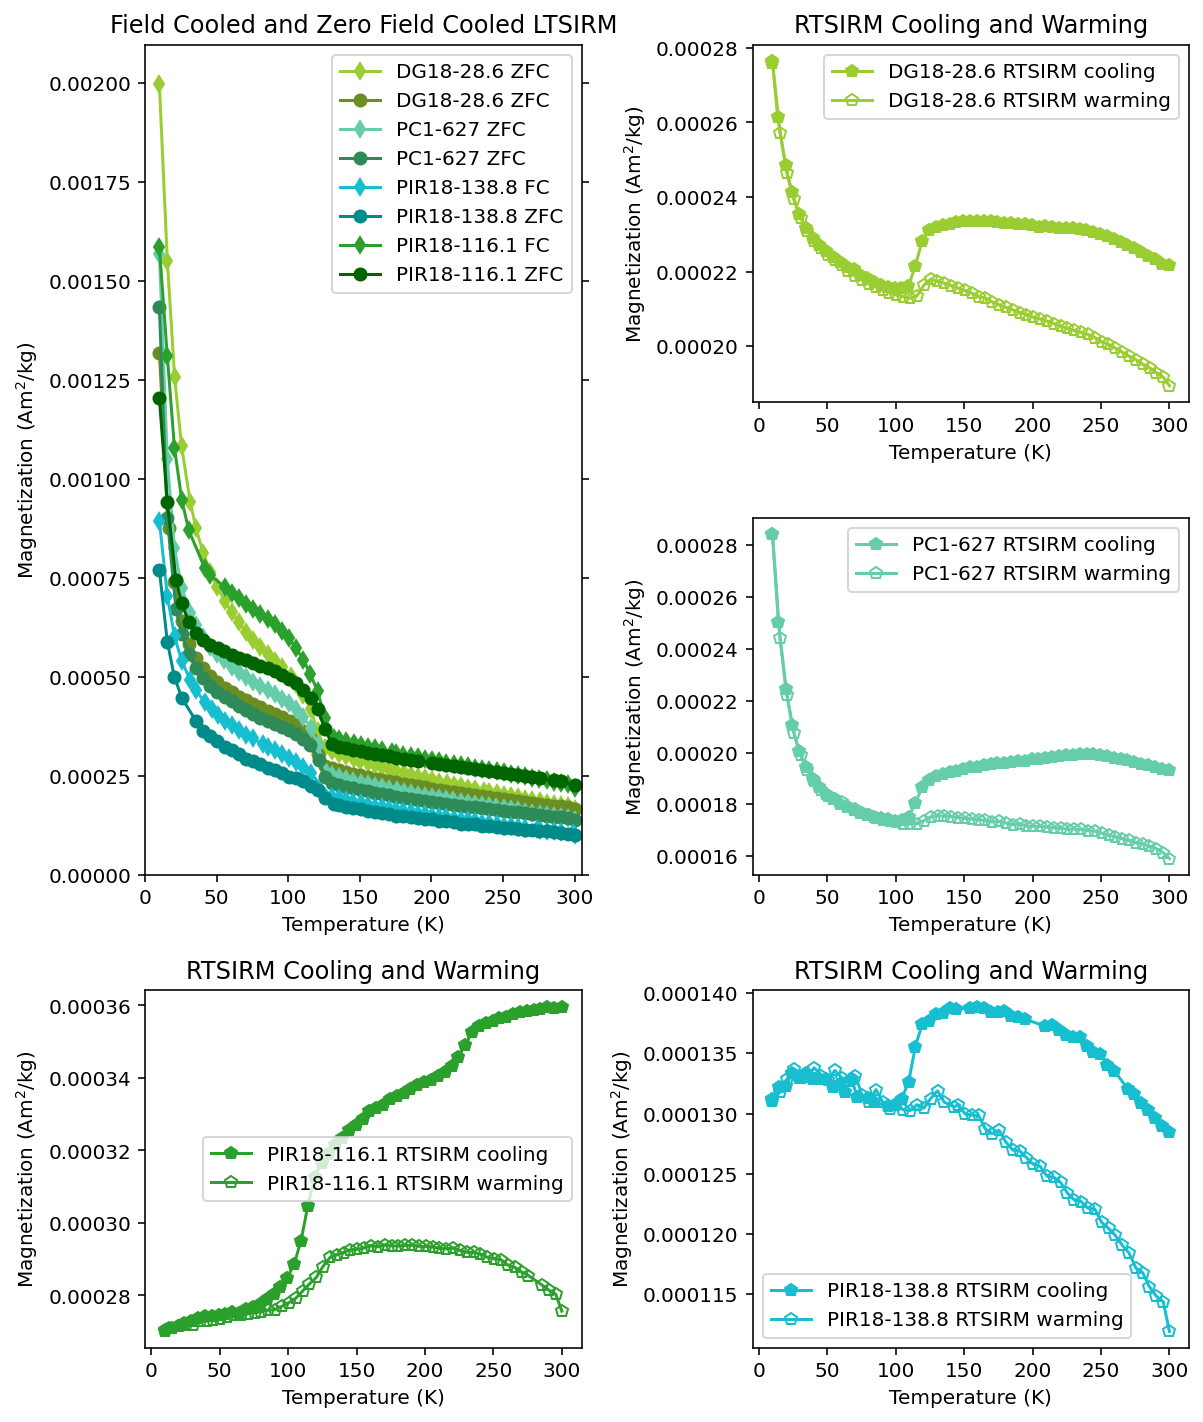

In [21]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
ax1 = plt.subplot2grid((3,2),(0,0),rowspan=2)
plt.plot(DG18_28['FC'][0], DG18_28['FC'][1],label='DG18-28.6 ZFC',color = 'yellowgreen', marker = 'd', markerfacecolor='yellowgreen', markeredgecolor='yellowgreen')
plt.plot(DG18_28['ZFC'][0], DG18_28['ZFC'][1],label='DG18-28.6 ZFC',color ='olivedrab', marker = 'o', markerfacecolor='olivedrab', markeredgecolor='olivedrab')
plt.plot(PC1_627['FC'][0], PC1_627['FC'][1],label='PC1-627 ZFC',color = 'mediumaquamarine', marker = 'd', markerfacecolor='mediumaquamarine', markeredgecolor='mediumaquamarine')
plt.plot(PC1_627['ZFC'][0], PC1_627['ZFC'][1],label='PC1-627 ZFC',color ='seagreen', marker = 'o', markerfacecolor='seagreen', markeredgecolor='seagreen')
plt.plot(PIR18_138['FC'][0], PIR18_138['FC'][1],label='PIR18-138.8 FC',color = 'tab:cyan', marker = 'd', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PIR18_138['ZFC'][0], PIR18_138['ZFC'][1],label='PIR18-138.8 ZFC',color ='darkcyan', marker = 'o', markerfacecolor='darkcyan', markeredgecolor='darkcyan')
plt.plot(PIR18_116['FC'][0], PIR18_116['FC'][1],label='PIR18-116.1 FC',color = 'tab:green', marker = 'd', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PIR18_116['ZFC'][0], PIR18_116['ZFC'][1],label='PIR18-116.1 ZFC',color ='darkgreen', marker = 'o', markerfacecolor='darkgreen', markeredgecolor='darkgreen')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(DG18_28['FC'][1])+.0001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((3,2),(0,1))
plt.plot(DG18_28['RT_cool'][0], DG18_28['RT_cool'][1],label='DG18-28.6 RTSIRM cooling',color = 'yellowgreen', marker = 'p', markerfacecolor='yellowgreen', markeredgecolor='yellowgreen')
plt.plot(DG18_28['RT_warm'][0], DG18_28['RT_warm'][1],label='DG18-28.6 RTSIRM warming',color = 'yellowgreen', marker = 'p', markerfacecolor= "None", markeredgecolor='yellowgreen')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(1,1))
plt.plot(PC1_627['RT_cool'][0], PC1_627['RT_cool'][1],label='PC1-627 RTSIRM cooling',color = 'mediumaquamarine', marker = 'p', markerfacecolor='mediumaquamarine', markeredgecolor='mediumaquamarine')
plt.plot(PC1_627['RT_warm'][0], PC1_627['RT_warm'][1],label='PC1-627 RTSIRM warming',color = 'mediumaquamarine', marker = 'p', markerfacecolor= "None", markeredgecolor='mediumaquamarine')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

plt.subplot2grid((3,2),(2,1))
plt.plot(PIR18_138['RT_cool'][0], PIR18_138['RT_cool'][1],label='PIR18-138.8 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PIR18_138['RT_warm'][0], PIR18_138['RT_warm'][1],label='PIR18-138.8 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
# plt.plot(PIR18_116['RT_cool'][0], PIR18_116['RT_cool'][1],label='PIR18-116.1 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
# plt.plot(PIR18_116['RT_warm'][0], PIR18_116['RT_warm'][1],label='PIR18-116.1 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor="None", markeredgecolor='tab:green')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(2,0))
# plt.plot(PIR18_138['RT_cool'][0], PIR18_138['RT_cool'][1],label='PIR18-138.8 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
# plt.plot(PIR18_138['RT_warm'][0], PIR18_138['RT_warm'][1],label='PIR18-138.8 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
plt.plot(PIR18_116['RT_cool'][0], PIR18_116['RT_cool'][1],label='PIR18-116.1 RTSIRM cooling',color = 'tab:green', marker = 'p', markerfacecolor='tab:green', markeredgecolor='tab:green')
plt.plot(PIR18_116['RT_warm'][0], PIR18_116['RT_warm'][1],label='PIR18-116.1 RTSIRM warming',color = 'tab:green', marker = 'p', markerfacecolor="None", markeredgecolor='tab:green')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/Facies1_MPMS_plots_Combo.pdf')
plt.show()

Now Facies 3

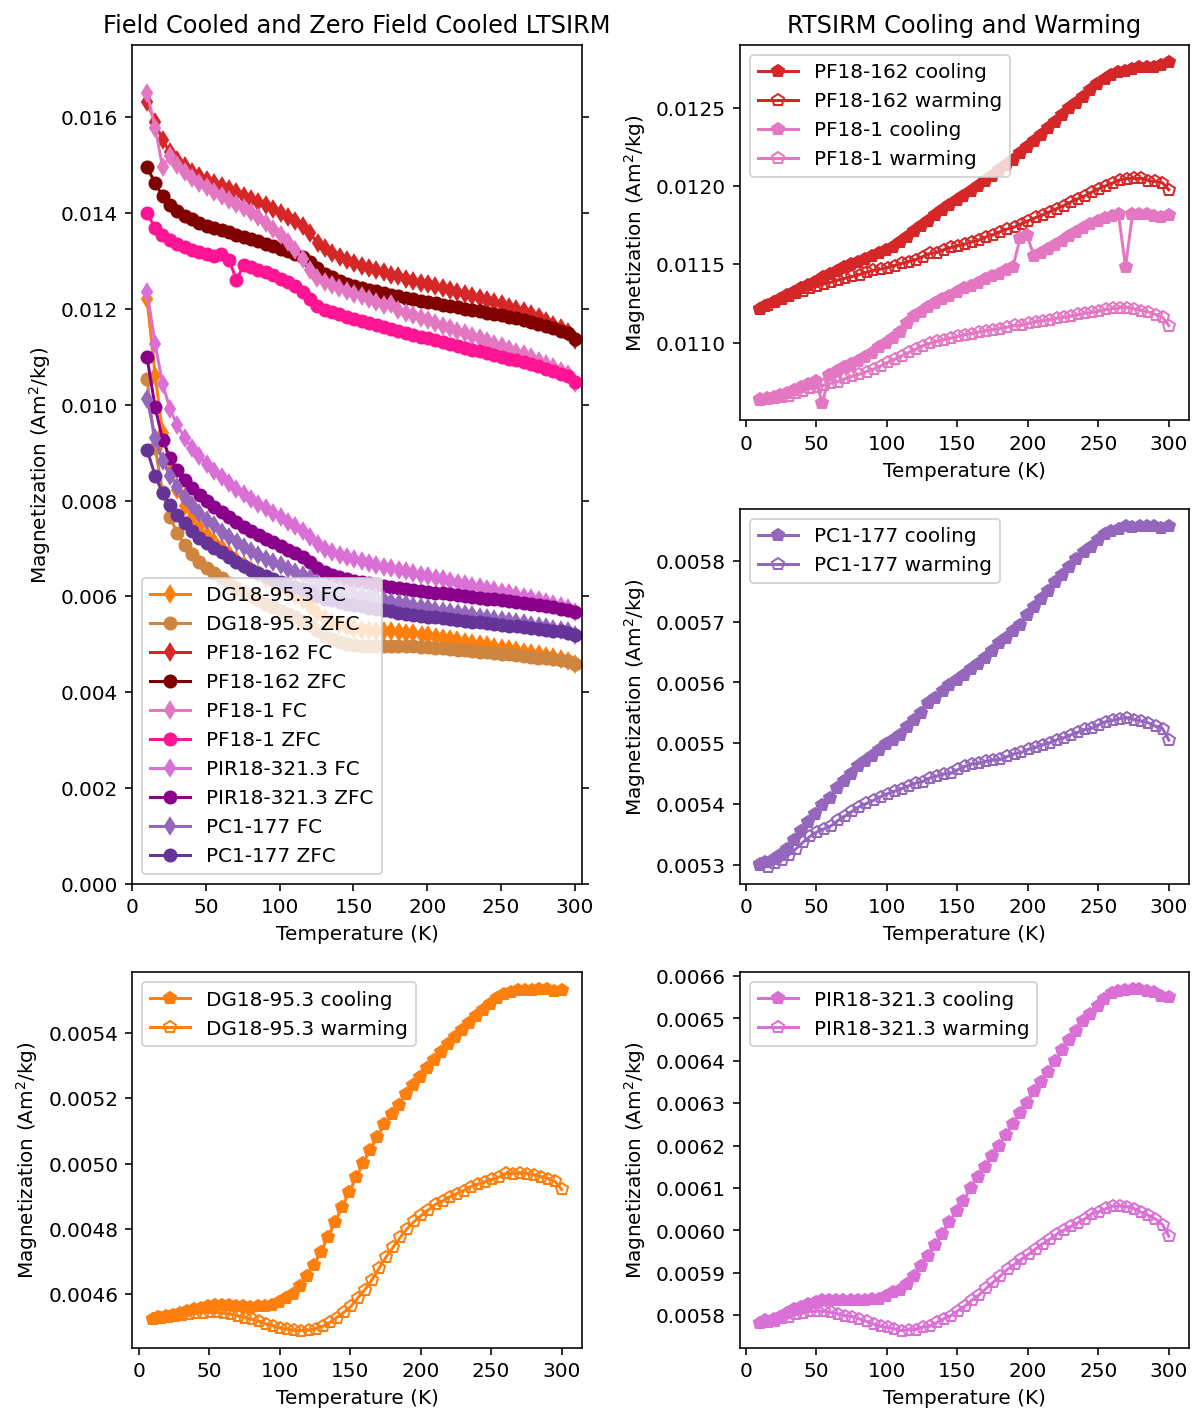

In [22]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))

ax1 = plt.subplot2grid((3,2),(0,0),rowspan=2)
plt.plot(DG18_95['FC'][0], DG18_95['FC'][1],label='DG18-95.3 FC',color = 'tab:orange', marker = 'd', markerfacecolor='tab:orange', markeredgecolor='tab:orange')
plt.plot(DG18_95['ZFC'][0], DG18_95['ZFC'][1],label='DG18-95.3 ZFC',color ='peru', marker = 'o', markerfacecolor='peru', markeredgecolor='peru')
plt.plot(PF18_162['FC'][0], PF18_162['FC'][1],label='PF18-162 FC',color = 'tab:red', marker = 'd', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PF18_162['ZFC'][0], PF18_162['ZFC'][1],label='PF18-162 ZFC',color ='maroon', marker = 'o', markerfacecolor='maroon', markeredgecolor='maroon')
plt.plot(PF18_1['FC'][0], PF18_1['FC'][1],label='PF18-1 FC',color = 'tab:pink', marker = 'd', markerfacecolor='tab:pink', markeredgecolor='tab:pink')
plt.plot(PF18_1['ZFC'][0], PF18_1['ZFC'][1],label='PF18-1 ZFC',color ='deeppink', marker = 'o', markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.plot(PIR18_321['FC'][0], PIR18_321['FC'][1],label='PIR18-321.3 FC',color = 'orchid', marker = 'd', markerfacecolor='orchid', markeredgecolor='orchid')
plt.plot(PIR18_321['ZFC'][0], PIR18_321['ZFC'][1],label='PIR18-321.3 ZFC',color ='darkmagenta', marker = 'o', markerfacecolor='darkmagenta', markeredgecolor='darkmagenta')
plt.plot(PC1_177['FC'][0], PC1_177['FC'][1],label='PC1-177 FC',color = 'tab:purple', marker = 'd', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PC1_177['ZFC'][0], PC1_177['ZFC'][1],label='PC1-177 ZFC',color ='rebeccapurple', marker = 'o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(PF18_1['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

ax2 = plt.subplot2grid((3,2),(2,0))
plt.plot(DG18_95['RT_cool'][0], DG18_95['RT_cool'][1],label='DG18-95.3 cooling',color = 'tab:orange', marker = 'p', markerfacecolor='tab:orange', markeredgecolor='tab:orange')
plt.plot(DG18_95['RT_warm'][0], DG18_95['RT_warm'][1],label='DG18-95.3 warming',color = 'tab:orange', marker = 'p', markerfacecolor="None", markeredgecolor='tab:orange')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.legend()

ax3 = plt.subplot2grid((3,2),(0,1))
plt.plot(PF18_162['RT_cool'][0], PF18_162['RT_cool'][1],label='PF18-162 cooling',color = 'tab:red', marker = 'p', markerfacecolor='tab:red', markeredgecolor='tab:red')
plt.plot(PF18_162['RT_warm'][0], PF18_162['RT_warm'][1],label='PF18-162 warming',color = 'tab:red', marker = 'p', markerfacecolor="None", markeredgecolor='tab:red')
plt.plot(PF18_1['RT_cool'][0], PF18_1['RT_cool'][1],label='PF18-1 cooling',color = 'tab:pink', marker = 'p', markerfacecolor='tab:pink', markeredgecolor='tab:pink')
plt.plot(PF18_1['RT_warm'][0], PF18_1['RT_warm'][1],label='PF18-1 warming',color = 'tab:pink', marker = 'p', markerfacecolor="None", markeredgecolor='tab:pink')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

ax4 = plt.subplot2grid((3,2),(1,1))
plt.plot(PC1_177['RT_cool'][0], PC1_177['RT_cool'][1],label='PC1-177 cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PC1_177['RT_warm'][0], PC1_177['RT_warm'][1],label='PC1-177 warming',color = 'tab:purple', marker = 'p', markerfacecolor="None", markeredgecolor='tab:purple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()


plt.subplot2grid((3,2),(2,1))
plt.plot(PIR18_321['RT_cool'][0], PIR18_321['RT_cool'][1],label='PIR18-321.3 cooling',color = 'orchid', marker = 'p', markerfacecolor='orchid', markeredgecolor='orchid')
plt.plot(PIR18_321['RT_warm'][0], PIR18_321['RT_warm'][1],label='PIR18-321.3 warming',color = 'orchid', marker = 'p', markerfacecolor="None", markeredgecolor='orchid')
# plt.plot(PC1_177['RT_cool'][0], PC1_177['RT_cool'][1],label='PC1-177 RTSIRM cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
# plt.plot(PC1_177['RT_warm'][0], PC1_177['RT_warm'][1],label='PC1-177 RTSIRM warming',color = 'tab:purple', marker = 'p', markerfacecolor="None", markeredgecolor='tab:purple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()


plt.tight_layout()
plt.savefig('code_output/Facies3_MPMS_plots_Combo.pdf')
plt.show()

Now Facies 2!

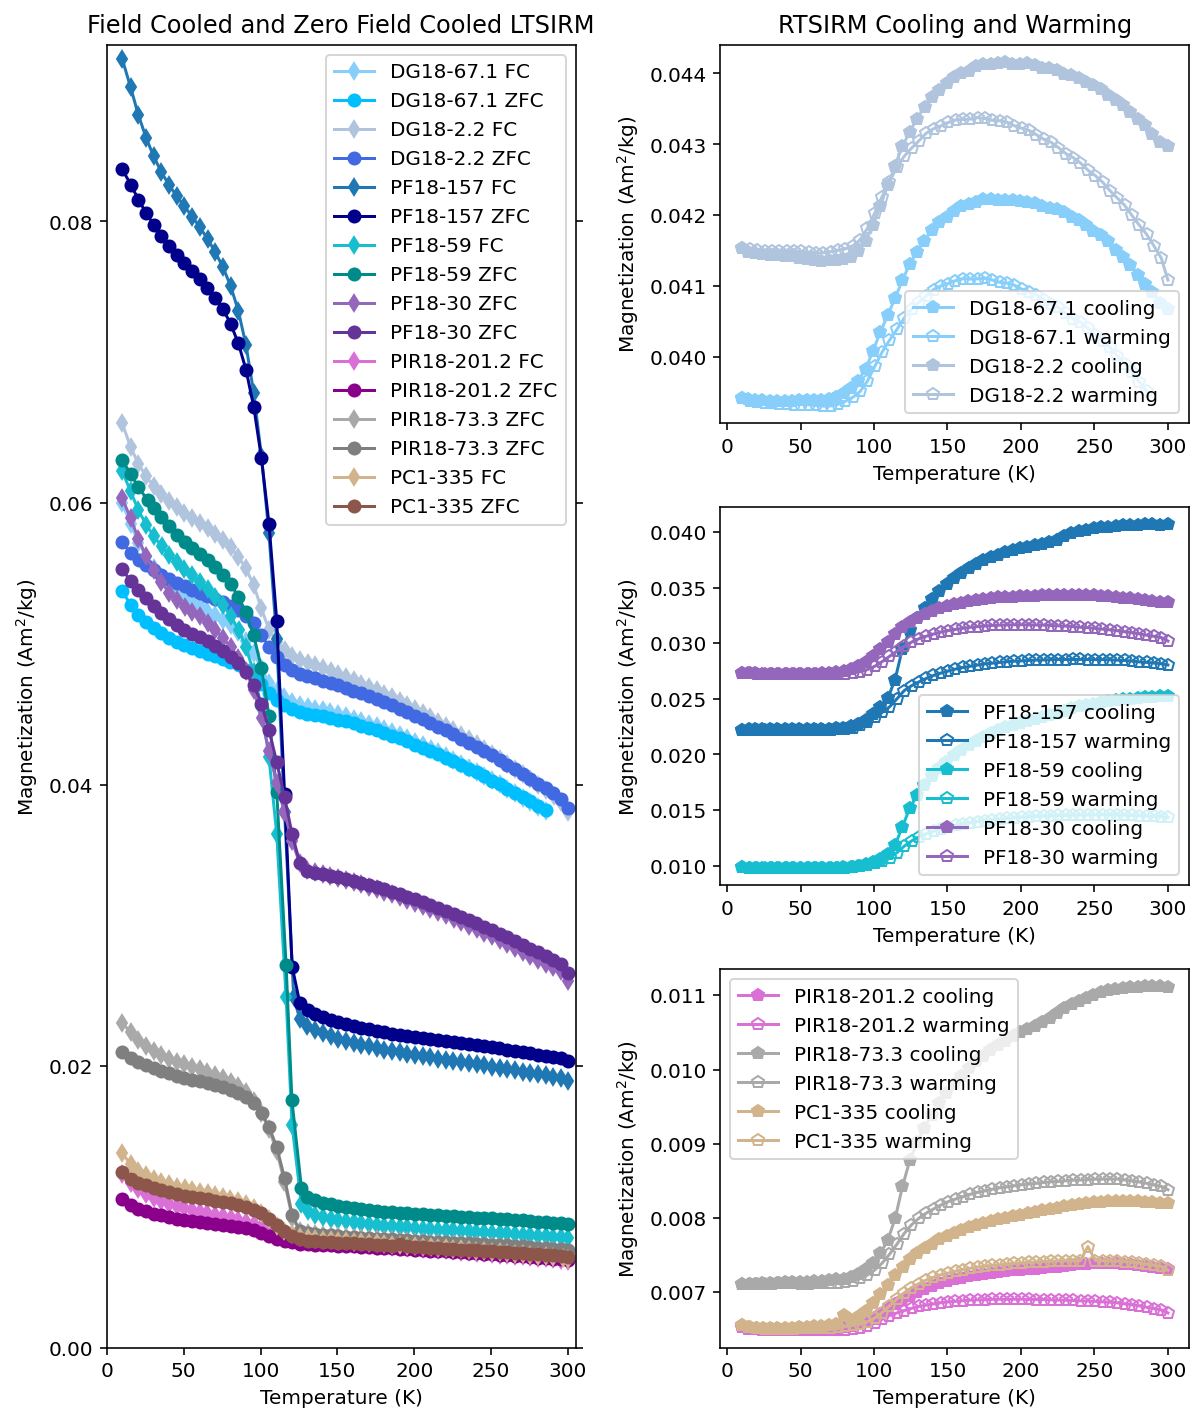

In [24]:
#SIde by side of FC-ZFC and RTSIRM
plt.figure(figsize=(8.5,10))
plt.subplot2grid((3,2),(0,0),rowspan=3)
# plt.subplot2grid((2,2),(0,0),rowspan=2)
plt.plot(DG18_67['FC'][0], DG18_67['FC'][1],label='DG18-67.1 FC',color = 'lightskyblue', marker = 'd', markerfacecolor='lightskyblue', markeredgecolor='lightskyblue')
plt.plot(DG18_67['ZFC'][0], DG18_67['ZFC'][1],label='DG18-67.1 ZFC',color ='deepskyblue', marker = 'o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue')
plt.plot(DG18_2['FC'][0], DG18_2['FC'][1],label='DG18-2.2 FC',color = 'lightsteelblue', marker = 'd', markerfacecolor='lightsteelblue', markeredgecolor='lightsteelblue')
plt.plot(DG18_2['ZFC'][0], DG18_2['ZFC'][1],label='DG18-2.2 ZFC',color ='royalblue', marker = 'o', markerfacecolor='royalblue', markeredgecolor='royalblue')
plt.plot(PF18_157['FC'][0], PF18_157['FC'][1],label='PF18-157 FC',color = 'tab:blue', marker = 'd', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PF18_157['ZFC'][0], PF18_157['ZFC'][1],label='PF18-157 ZFC',color ='darkblue', marker = 'o', markerfacecolor='darkblue', markeredgecolor='darkblue')
plt.plot(PF18_59['FC'][0], PF18_59['FC'][1],label='PF18-59 FC',color = 'tab:cyan', marker = 'd', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PF18_59['ZFC'][0], PF18_59['ZFC'][1],label='PF18-59 ZFC',color ='darkcyan', marker = 'o', markerfacecolor='darkcyan', markeredgecolor='darkcyan')
plt.plot(PF18_30['FC'][0], PF18_30['FC'][1],label='PF18-30 ZFC',color = 'tab:purple', marker = 'd', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PF18_30['ZFC'][0], PF18_30['ZFC'][1],label='PF18-30 ZFC',color ='rebeccapurple', marker = 'o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple')
plt.plot(PIR18_201['FC'][0], PIR18_201['FC'][1],label='PIR18-201.2 FC',color = 'orchid', marker = 'd', markerfacecolor='orchid', markeredgecolor='orchid')
plt.plot(PIR18_201['ZFC'][0], PIR18_201['ZFC'][1],label='PIR18-201.2 ZFC',color ='darkmagenta', marker = 'o', markerfacecolor='darkmagenta', markeredgecolor='darkmagenta')
plt.plot(PIR18_73['FC'][0], PIR18_73['FC'][1],label='PIR18-73.3 ZFC',color = 'darkgray', marker = 'd', markerfacecolor='darkgray', markeredgecolor='darkgray')
plt.plot(PIR18_73['ZFC'][0], PIR18_73['ZFC'][1],label='PIR18-73.3 ZFC',color ='tab:gray', marker = 'o', markerfacecolor='tab:gray', markeredgecolor='tab:gray')
plt.plot(PC1_335['FC'][0], PC1_335['FC'][1],label='PC1-335 FC',color = 'tan', marker = 'd', markerfacecolor='tan', markeredgecolor='tan')
plt.plot(PC1_335['ZFC'][0], PC1_335['ZFC'][1],label='PC1-335 ZFC',color ='tab:brown', marker = 'o', markerfacecolor='tab:brown', markeredgecolor='tab:brown')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlim(0,305)
plt.ylim(0,max(PF18_157['FC'][1])+.001)
plt.tick_params(axis='y', right='on', direction = 'out')
plt.xlabel('Temperature (K)')
plt.title('Field Cooled and Zero Field Cooled LTSIRM')
plt.legend()

plt.subplot2grid((3,2),(0,1))
plt.plot(DG18_67RTcool_T, DG18_67RTcool_M,label='DG18-67.1 cooling',color = 'lightskyblue', marker = 'p', markerfacecolor='lightskyblue', markeredgecolor='lightskyblue')
plt.plot(DG18_67['RT_warm'][0], DG18_67['RT_warm'][1],label='DG18-67.1 warming',color = 'lightskyblue', marker = 'p', markerfacecolor="None", markeredgecolor='lightskyblue')
plt.plot(DG18_2['RT_cool'][0], DG18_2['RT_cool'][1],label='DG18-2.2 cooling',color = 'lightsteelblue', marker = 'p', markerfacecolor='lightsteelblue', markeredgecolor='lightsteelblue')
plt.plot(DG18_2['RT_warm'][0], DG18_2['RT_warm'][1],label='DG18-2.2 warming',color = 'lightsteelblue', marker = 'p', markerfacecolor="None", markeredgecolor='lightsteelblue')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.subplot2grid((3,2),(1,1))
plt.plot(PF18_157['RT_cool'][0], PF18_157['RT_cool'][1],label='PF18-157 cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
plt.plot(PF18_157['RT_warm'][0], PF18_157['RT_warm'][1],label='PF18-157 warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
plt.plot(PF18_59['RT_cool'][0], PF18_59['RT_cool'][1],label='PF18-59 cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
plt.plot(PF18_59['RT_warm'][0], PF18_59['RT_warm'][1],label='PF18-59 warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
plt.plot(PF18_30['RT_cool'][0], PF18_30['RT_cool'][1],label='PF18-30 cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
plt.plot(PF18_30['RT_warm'][0], PF18_30['RT_warm'][1],label='PF18-30 warming',color = 'tab:purple', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:purple')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
plt.xlabel('Temperature (K)')
plt.legend()

# plt.subplot2grid((2,2),(0,1))
# plt.plot(DG18_2['RT_cool'][0], DG18_2['RT_cool'][1],label='DG18-2.2 RTSIRM cooling',color = 'lightsteelblue', marker = 'p', markerfacecolor='lightsteelblue', markeredgecolor='lightsteelblue')
# plt.plot(DG18_2['RT_warm'][0], DG18_2['RT_warm'][1],label='DG18-2.2 RTSIRM warming',color = 'lightsteelblue', marker = 'p', markerfacecolor="None", markeredgecolor='lightsteelblue')
# plt.plot(DG18_67RTcool_T, DG18_67RTcool_M,label='DG18-67.1 RTSIRM cooling',color = 'lightskyblue', marker = 'p', markerfacecolor='lightskyblue', markeredgecolor='lightskyblue')
# plt.plot(DG18_67['RT_warm'][0], DG18_67['RT_warm'][1],label='DG18-67.1 RTSIRM warming',color = 'lightskyblue', marker = 'p', markerfacecolor="None", markeredgecolor='lightskyblue')
# plt.plot(PF18_157['RT_cool'][0], PF18_157['RT_cool'][1],label='PF18-157 RTSIRM cooling',color = 'tab:blue', marker = 'p', markerfacecolor='tab:blue', markeredgecolor='tab:blue')
# plt.plot(PF18_157['RT_warm'][0], PF18_157['RT_warm'][1],label='PF18-157 RTSIRM warming',color = 'tab:blue', marker = 'p', markerfacecolor="None", markeredgecolor='tab:blue')
# plt.plot(PF18_59['RT_cool'][0], PF18_59['RT_cool'][1],label='PF18-59 RTSIRM cooling',color = 'tab:cyan', marker = 'p', markerfacecolor='tab:cyan', markeredgecolor='tab:cyan')
# plt.plot(PF18_59['RT_warm'][0], PF18_59['RT_warm'][1],label='PF18-59 RTSIRM warming',color = 'tab:cyan', marker = 'p', markerfacecolor="None", markeredgecolor='tab:cyan')
# plt.plot(PF18_30['RT_cool'][0], PF18_30['RT_cool'][1],label='PF18-30 RTSIRM cooling',color = 'tab:purple', marker = 'p', markerfacecolor='tab:purple', markeredgecolor='tab:purple')
# plt.plot(PF18_30['RT_warm'][0], PF18_30['RT_warm'][1],label='PF18-30 RTSIRM warming',color = 'tab:purple', marker = 'p', markerfacecolor= "None", markeredgecolor='tab:purple')
# plt.ylabel('Magnetization ($Am^{2}/kg$)')
# plt.xlabel('Temperature (K)')
# plt.legend()

# plt.subplot2grid((2,2),(1,1))
# plt.plot(PC1_335['RT_cool'][0], PC1_335['RT_cool'][1],label='PC1-335 RTSIRM cooling',color = 'tan', marker = 'p', markerfacecolor='tan', markeredgecolor='tan')
# plt.plot(PC1_335['RT_warm'][0], PC1_335['RT_warm'][1],label='PC1-335 RTSIRM warming',color = 'tan', marker = 'p', markerfacecolor="None", markeredgecolor='tan')
# plt.plot(PIR18_201['RT_cool'][0], PIR18_201['RT_cool'][1],label='PIR18-201.2 RTSIRM cooling',color = 'orchid', marker = 'p', markerfacecolor='orchid', markeredgecolor='orchid')
# plt.plot(PIR18_201['RT_warm'][0], PIR18_201['RT_warm'][1],label='PIR18-201.2 RTSIRM warming',color = 'orchid', marker = 'p', markerfacecolor="None", markeredgecolor='orchid')
# plt.plot(PIR18_73['RT_cool'][0], PIR18_73['RT_cool'][1],label='PIR18-73.3 RTSIRM cooling',color = 'darkgray', marker = 'p', markerfacecolor='darkgray', markeredgecolor='darkgray')
# plt.plot(PIR18_73['RT_warm'][0], PIR18_73['RT_warm'][1],label='PIR18-73.3 RTSIRM warming',color = 'darkgray', marker = 'p', markerfacecolor= "None", markeredgecolor='darkgray')
# plt.xlabel('Temperature (K)')
# plt.ylabel('Magnetization ($Am^{2}/kg$)')
# plt.title('RTSIRM Cooling and Warming')
# plt.legend()

plt.subplot2grid((3,2),(2,1))
plt.plot(PIR18_201['RT_cool'][0], PIR18_201['RT_cool'][1],label='PIR18-201.2 cooling',color = 'orchid', marker = 'p', markerfacecolor='orchid', markeredgecolor='orchid')
plt.plot(PIR18_201['RT_warm'][0], PIR18_201['RT_warm'][1],label='PIR18-201.2 warming',color = 'orchid', marker = 'p', markerfacecolor="None", markeredgecolor='orchid')
plt.plot(PIR18_73['RT_cool'][0], PIR18_73['RT_cool'][1],label='PIR18-73.3 cooling',color = 'darkgray', marker = 'p', markerfacecolor='darkgray', markeredgecolor='darkgray')
plt.plot(PIR18_73['RT_warm'][0], PIR18_73['RT_warm'][1],label='PIR18-73.3 warming',color = 'darkgray', marker = 'p', markerfacecolor= "None", markeredgecolor='darkgray')
plt.plot(PC1_335['RT_cool'][0], PC1_335['RT_cool'][1],label='PC1-335 cooling',color = 'tan', marker = 'p', markerfacecolor='tan', markeredgecolor='tan')
plt.plot(PC1_335['RT_warm'][0], PC1_335['RT_warm'][1],label='PC1-335 warming',color = 'tan', marker = 'p', markerfacecolor="None", markeredgecolor='tan')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization ($Am^{2}/kg$)')
#plt.title('RTSIRM Cooling and Warming')
plt.legend()

plt.tight_layout()
plt.savefig('code_output/Facies2_MPMS_plots_Combo_v2.pdf')
plt.show()